# **Surface vs Bulk Analysis**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Materials_Parameters as params

from MTI_Analytical import FMTI2_SemiInfinite
from MTI_Discretization import eigenstates_Dirichlet as eigenstates
from MTI_Second_Order import FMTI2_NeumannBC, FMTI2_Relative_Coordinates, FMTI2_Wigner_Transform, Change_Basis

## Bulk States

#### **Energy Spectrum**

In [2]:
# lattice
Nlat = 100; d = 100.; dZ = d/(Nlat-1)

egval = []
momentum = np.linspace(-0.15, 0.15, 101)

for k in momentum:
    
    # eigenstates
    lattice, egv, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx = k, ky = 0., L = 0.020, C=0.3)

    egval.append(np.sort(egv))

egval = np.array(egval)

print(egval.shape)

(101, 400)


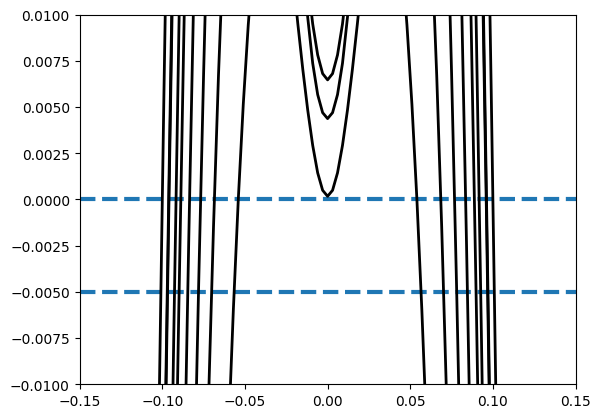

In [3]:
fig, ax = plt.subplots(1)

ax.axhline(0, ls='--', lw=3)
ax.axhline(-0.005, ls='--', lw=3)


n = 20
for idx in range(n):

    iegv = 200 - int(n/2) + idx 
    
    ax.plot(momentum, egval[:,iegv], c='black', lw=2)


ax.set_xlim(-0.15,0.15);
ax.set_ylim(-0.01,0.01);

#### **Induced Pairing**

In [4]:
# shape of the matrix 
n = 4

# space dimensions
K = []; Z = []
k_dim = 100; z_dim = 100

# read file pairing
rows = np.loadtxt("pairing_bulk.txt")

# store data in matrices
F_bulk = np.empty((k_dim, z_dim), dtype='object')


# loop over momenta
for idx in range(k_dim):
    
    # loop over space
    for jdx in range(z_dim):

        # index for rows
        irow = z_dim * idx + jdx
                
        # read one row
        row = rows[irow]
    
        if jdx == 0: K.append(float(row[0]))
    
        if idx == 0: Z.append(float(row[1]))
    
        # real part
        real = row[2 : 2 + n*n].reshape((n, n))
        # imaginary part
        imag = row[2 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_bulk[idx][jdx] = matrix

print(F_bulk.shape)

(100, 100)


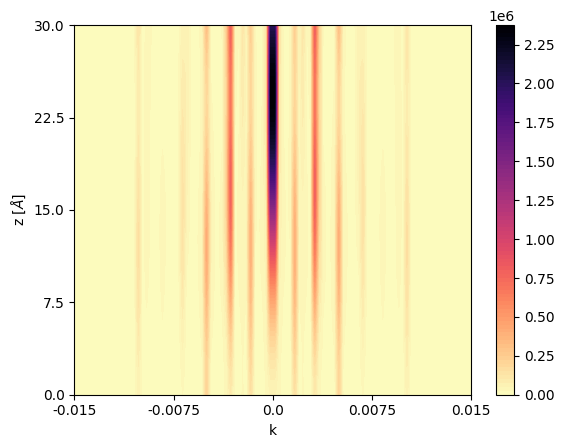

In [5]:
F = np.empty((k_dim, z_dim))

for idx in range(k_dim):
    for jdx in range(z_dim):

        F[idx][jdx] = np.linalg.norm(F_bulk[idx][jdx])


contour = plt.contourf(F.T, levels=100, cmap='magma_r')
plt.colorbar(contour)

y_ticks = np.linspace(0, len(Z)-1, 5)
y_labels = np.linspace(Z[0], Z[-1], 5)

x_ticks = np.linspace(0, len(K)-1, 5)
x_labels = np.linspace(K[0], K[-1], 5)


plt.xticks(x_ticks, x_labels);
plt.yticks(y_ticks, y_labels);

plt.xlabel('k')
plt.ylabel('z [$\AA$]');

In [6]:
np.sum(F.T)/18

40357181.456332

## Surface States

#### **Energy Spectrum**

In [14]:
# lattice
Nlat = 100; d = 100.; dZ = d/(Nlat-1)

egval = []
momentum = np.linspace(-0.025, 0.025, 151)

for k in momentum:
    
    # eigenstates
    lattice, egv, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx = k, ky = 0., L = 0.020)

    egval.append(np.sort(egv))

egval = np.array(egval)

print(egval.shape)

(151, 400)


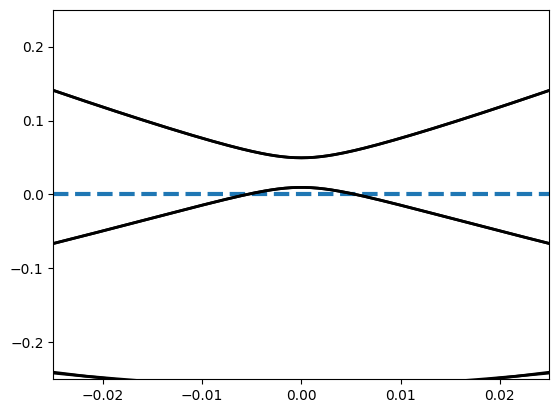

In [19]:
fig, ax = plt.subplots(1)

ax.axhline(0, ls='--', lw=3)

n = 20
for idx in range(n):

    iegv = 200 - int(n/2) + idx 
    
    ax.plot(momentum, egval[:,iegv], c='black', lw=2)

ax.set_xlim(-0.025,0.025);
ax.set_ylim(-0.25,0.25);

In [9]:
# shape of the matrix 
n = 4

# space dimensions
K = []; Z = []
k_dim = 100; z_dim = 100

# read file pairing
rows = np.loadtxt("pairing_surface.txt")

# store data in matrices
F_surface = np.empty((k_dim, z_dim), dtype='object')


# loop over momenta
for idx in range(k_dim):
    
    # loop over space
    for jdx in range(z_dim):

        # index for rows
        irow = z_dim * idx + jdx
                
        # read one row
        row = rows[irow]
    
        if jdx == 0: K.append(float(row[0]))
    
        if idx == 0: Z.append(float(row[1]))
    
        # real part
        real = row[2 : 2 + n*n].reshape((n, n))
        # imaginary part
        imag = row[2 + n*n :].reshape((n, n))
        # pairing matrix
        matrix = real + 1j * imag

        F_surface[idx][jdx] = matrix

print(F_surface.shape)

(100, 100)


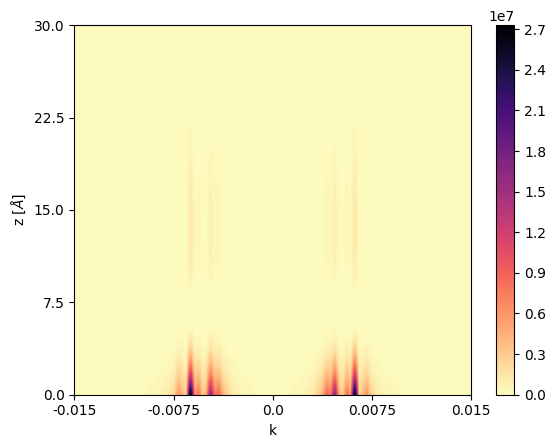

In [10]:
F = np.empty((k_dim, z_dim))

for idx in range(k_dim):
    for jdx in range(z_dim):

        F[idx][jdx] = np.linalg.norm(F_surface[idx][jdx])


contour = plt.contourf(F.T, levels=100, cmap='magma_r')
plt.colorbar(contour)

y_ticks = np.linspace(0, len(Z)-1, 5)
y_labels = np.linspace(Z[0], Z[-1], 5)

x_ticks = np.linspace(0, len(K)-1, 5)
x_labels = np.linspace(K[0], K[-1], 5)


plt.xticks(x_ticks, x_labels);
plt.yticks(y_ticks, y_labels);

plt.xlabel('k')
plt.ylabel('z [$\AA$]');

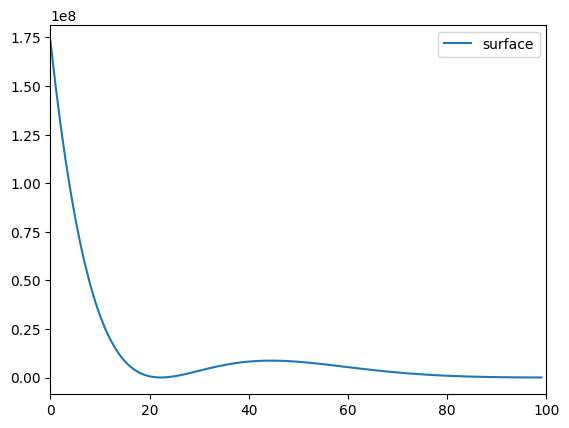

In [11]:
# matrices for signlet
#F_avg = np.zeros((z_dim,4,4), dtype='complex')


F_avg_surf = np.sum( np.array(F_surface), axis=0)
F_avg_bulk = np.sum( np.array(F_bulk), axis=0)


plt.plot( [ np.sum(abs(f)) for f in F_avg_surf], label='surface' )
#plt.plot( [ np.linalg.norm(f) for f in F_avg_bulk], label='bulk' )

plt.xlim(0,100)
plt.legend();